<h1>Proyecto 2:  Analisis de datos</h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_asma_data = pd.read_csv('./datos/Datos_proyecto_II_BI_2021.csv', sep=',', encoding = 'latin-1')

C:\Users\El supremo\AppData\Local\Temp\ipykernel_14932\3929278842.py:1: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  df_asma_data = pd.read_csv('./datos/Datos_proyecto_II_BI_2021.csv', sep=',', encoding = 'latin-1')


In [3]:
df_asma_data.shape

(8630, 601)

In [4]:
df_asma_data.sample(5)

,Unnamed: 0,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,...,NPCHP35C,NPCHP35D,NPCHP35E,NPCHP35F,NPCHP35I,NPCHP35J,NPCHP35K,NPCHP36,NPCHP36A,NPCHP37
2554,2555,1065824,10658241,106582412,11,11001,1,9.0,Fontibon,114.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
6262,6263,326662,3266621,32666214,11,11001,1,11.0,Suba,806.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
6836,6837,334633,3346331,33463311,11,11001,1,4.0,San Cristobal,32.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2543,2544,1065171,10651711,106517114,11,11001,1,9.0,Fontibon,114.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
7061,7062,337606,3376061,33760614,11,11001,1,11.0,Suba,806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


## 1. Entendimiento de los datos:

<b>Objetivo: ¿Cuál es la relación entre el medio de transporte usado y la aparición de síntomas sugestivos de asma entre la población de las diferentes localidades de Bogotá durante el 2021?</b>

Para esto se va a revisar las columnas:
- NOMBRE_LOCALIDAD
- DPTO: 11 (Bogotá)
- MPIO: 11001 municipio bogotá
- NPCFP14F: .le han diagnosticado alguna de estas enfermedades o problemas de salud: 6. Enfermedades respiratorias crónicas como: Asma, EPOC, Enfisema?

- NPCHP18AA: Cúales medios de transporte utiliza-> Transmilenio
- NPCHP18AB: Cúales medios de transporte utiliza-> SITP
- NPCHP18AC: Cúales medios de transporte utiliza-> buseta o colectivo
- NPCHP18AD: Cúales medios de transporte utiliza-> automóvil de uso particular
- NPCHP18AE: Cúales medios de transporte utiliza-> Taxi
- NPCHP18AF: Cúales medios de transporte utiliza-> Motocicleta
- NPCHP18AG: Cúales medios de transporte utiliza-> Bicicleta
- NPCHP18AH: Cúales medios de transporte utiliza-> Ruta escolar
- NPCHP18AI: Cúales medios de transporte utiliza-> A pie
- NPCHP18AI1: Cúales medios de transporte utiliza-> Bus intermunicipal
- NPCHP18AJ: Cúales medios de transporte utiliza-> bicitaxi o mototaxi
- NPCHP18AK: Cúales medios de transporte utiliza-> particulares plataformas o aplicaciones
- NPCHP18AL: Cúales medios de transporte utiliza-> vehículo, patineta o moto elécticos
- NPCHP18AM: Cúales medios de transporte utiliza-> caballo
- NPCHP18AN: Cúales medios de transporte utiliza-> otros
- NPCHP18AO: Cúales medios de transporte utiliza-> no se desplaza





Completitud de los datos:
En base a los siguientes analisis podremos notar que hay varios datos que están vacios por lo que es importante revisar solo las columnas que van a ser usadas en el analisis:

In [43]:
columnas_de_interes=["NOMBRE_LOCALIDAD","DPTO","MPIO","NPCFP14F","NPCHP18AA", "NPCHP18AB", "NPCHP18AC", "NPCHP18AD", "NPCHP18AE", "NPCHP18AF", "NPCHP18AG", "NPCHP18AH", "NPCHP18AI", "NPCHP18AI1", "NPCHP18AJ", "NPCHP18AK", "NPCHP18AL", "NPCHP18AM", "NPCHP18AN", "NPCHP18AO"]
df_asma_r = df_asma_data[columnas_de_interes]

In [44]:
df_asma_bogota=df_asma_r[df_asma_r["DPTO"]==11] 

In [45]:
print(df_asma_bogota.isnull().sum())

NOMBRE_LOCALIDAD       0
DPTO                   0
MPIO                   0
NPCFP14F               0
NPCHP18AA           5597
NPCHP18AB           5597
NPCHP18AC           5597
NPCHP18AD           5597
NPCHP18AE           5597
NPCHP18AF           5597
NPCHP18AG           5597
NPCHP18AH           5597
NPCHP18AI           5597
NPCHP18AI1          5597
NPCHP18AJ           5597
NPCHP18AK           5597
NPCHP18AL           5597
NPCHP18AM           7211
NPCHP18AN           5597
NPCHP18AO           5597
dtype: int64


In [46]:
print(df_asma_bogota.nunique())

NOMBRE_LOCALIDAD    20
DPTO                 1
MPIO                 1
NPCFP14F             1
NPCHP18AA            2
NPCHP18AB            2
NPCHP18AC            2
NPCHP18AD            2
NPCHP18AE            2
NPCHP18AF            2
NPCHP18AG            2
NPCHP18AH            2
NPCHP18AI            2
NPCHP18AI1           2
NPCHP18AJ            1
NPCHP18AK            2
NPCHP18AL            2
NPCHP18AM            1
NPCHP18AN            2
NPCHP18AO            2
dtype: int64


In [47]:
df_asma_bogota.duplicated().sum()


6934

In [48]:
def print_counts(df):
    cols=list(df.columns)
    for i in cols:
        print("Para la columna: "+i+"\n")
        print(df[i].value_counts())
        print ("_________________________\n")

In [49]:
print_counts(df_asma_bogota)

Para la columna: NOMBRE_LOCALIDAD

Suba                  855
Kennedy               790
Engativa              551
Ciudad Bolivar        498
Usaquen               453
Fontibon              439
Rafael Uribe Uribe    426
Teusaquillo           420
Bosa                  400
San Cristobal         396
Usme                  342
Santa Fe              290
Puente Aranda         281
Chapinero             253
Barrios Unidos        233
Tunjuelito            167
Los Martires          156
Antonio Nariño        138
La Candelaria         101
Sumapaz                49
Name: NOMBRE_LOCALIDAD, dtype: int64
_________________________

Para la columna: DPTO

11    7238
Name: DPTO, dtype: int64
_________________________

Para la columna: MPIO

11001    7238
Name: MPIO, dtype: int64
_________________________

Para la columna: NPCFP14F

1    7238
Name: NPCFP14F, dtype: int64
_________________________

Para la columna: NPCHP18AA

2.0    1497
1.0     144
Name: NPCHP18AA, dtype: int64
_________________________

Para

In [57]:
df_asma_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7238 entries, 0 to 8629
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOMBRE_LOCALIDAD  7238 non-null   object 
 1   DPTO              7238 non-null   int64  
 2   MPIO              7238 non-null   int64  
 3   NPCFP14F          7238 non-null   int64  
 4   NPCHP18AA         1641 non-null   float64
 5   NPCHP18AB         1641 non-null   float64
 6   NPCHP18AC         1641 non-null   float64
 7   NPCHP18AD         1641 non-null   float64
 8   NPCHP18AE         1641 non-null   float64
 9   NPCHP18AF         1641 non-null   float64
 10  NPCHP18AG         1641 non-null   float64
 11  NPCHP18AH         1641 non-null   float64
 12  NPCHP18AI         1641 non-null   float64
 13  NPCHP18AI1        1641 non-null   float64
 14  NPCHP18AJ         1641 non-null   float64
 15  NPCHP18AK         1641 non-null   float64
 16  NPCHP18AL         1641 non-null   float64


Diagrama relación Asma y problemas respiratorios x localidad

In [58]:
import matplotlib.pyplot as plt


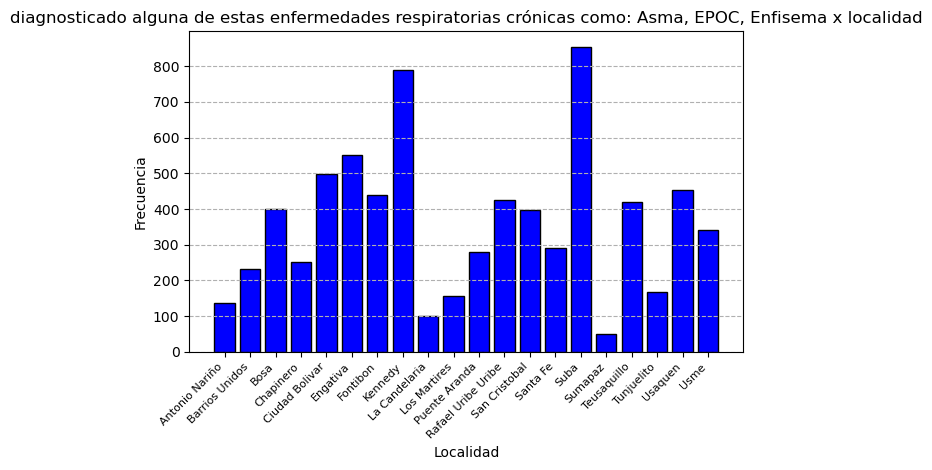

In [82]:
value_counts = df_asma_bogota['NOMBRE_LOCALIDAD'].value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('diagnosticado alguna de estas enfermedades respiratorias crónicas como: Asma, EPOC, Enfisema x localidad')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [83]:
def corr_asma_transport(df):
    cols= ["NPCHP18AA", "NPCHP18AB", "NPCHP18AC", "NPCHP18AD", "NPCHP18AE", "NPCHP18AF", "NPCHP18AG", "NPCHP18AH", "NPCHP18AI", "NPCHP18AI1", "NPCHP18AJ", "NPCHP18AK", "NPCHP18AL", "NPCHP18AM", "NPCHP18AN", "NPCHP18AO"]
    vals = {}
    for col in cols:
        vals[col]=len(df_asma_bogota[df_asma_bogota[col]==1])
    col_transport = list(vals.keys())
    values = list(vals.values())
    plt.bar(col_transport, values, color ='maroon',
        width = 0.4)
    plt.xlabel("Transporte")
    plt.ylabel("No. de personas con sintomas de asma")
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.grid(axis='y', linestyle='--')
    plt.title("Encuestados con asma por transporte")
    plt.show()

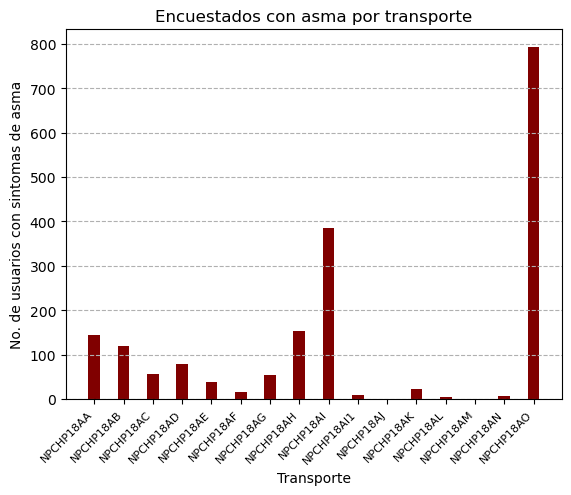

In [81]:
corr_asma_transport(df_asma_bogota)

 NPCHP18AL (Vehículo, patineta, bicicleta o moto eléctricos) y NPCHP18AO (No se desplaza) tienen una mayor relación 